# Practice Problem - Monte-Carlo Error Propagation

## Part 1

You have likely encountered the concept of propagation of uncertainty before (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.01~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in your script (you can just derive the equation by hand and implement it in a single line in your code).



In [55]:
# Computing with standard error propagation rules: 
M1 = 40e4
dM1 = 0.05e4
M2 = 30e4
dM2 = 0.1e4
r = 3.2
dr = 0.01
G = 6.67384e-11

F_oldschool = (G*M1*M2)/r**2
dF_oldschool = ( (dM1*G*M2/r**2)**2 + (dM2*G*M1/r**2)**2 + (-2*G*M1*M2*dr/r**3)**2 )**0.5

print("Resulting Force F = {0:.2e} +- {1:.2e}".format(F_oldschool, dF_oldschool))

Resulting Force F = 7.82e-01 +- 5.63e-03


Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1000000 times, using the means and standard deviations given above

* compute the gravitational force for each set of values

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1000000 different values for the forces.

In [56]:
import numpy as np

# These are the parameters
# d.. values are uncertainties, standard deviations 
M1 = 40e4
dM1 = 0.05e4
M2 = 30e4
dM2 = 0.1e4
r = 3.2
dr = 0.01
G = 6.67384e-11
number = 1000000 #number of values we want to generate

# Ranomly sampling values
M1ar = np.random.normal(M1, dM1, number)
M2ar = np.random.normal(M2, dM2, number)
rar = np.random.normal(r, dr, number)
Gar = np.ones(number)*G

# Now we compute the force with the formula
F = (M1ar*M2ar*Gar)/rar**2

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

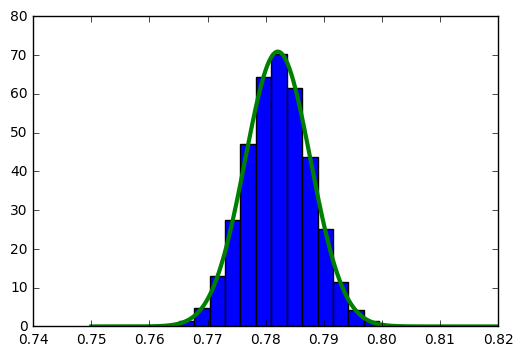

In [60]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
x = np.linspace(0.75, 0.82, 10e3)
plt.hist(F, normed=True, bins=20)
plt.plot(x,mlab.normpdf(x, F_oldschool, dF_oldschool), linewidth=3)
plt.show()

## Part 2

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm2\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm10\times10^4\rm{kg}$$
$$r=3.2\pm1.0~\rm{m}$$

and as above, produce a plot.

## Solution

Resulting Force F = 7.82e-01 +- 5.55e-01


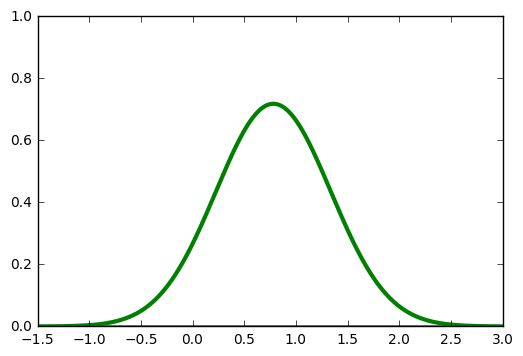

In [91]:
# Computing with standard error propagation rules: 
M1 = 40e4
dM1 = 2e4
M2 = 30e4
dM2 = 10e4
r = 3.2
dr = 1.0
G = 6.67384e-11

F_oldschool = (G*M1*M2)/r**2
dF_oldschool = ( (dM1*G*M2/r**2)**2 + (dM2*G*M1/r**2)**2 + (-2*G*M1*M2*dr/r**3)**2 )**0.5

print("Resulting Force F = {0:.2e} +- {1:.2e}".format(F_oldschool, dF_oldschool))

import numpy as np

number = 1000000 #number of values we want to generate

# Ranomly sampling values
M1ar = np.random.normal(M1, dM1, number)
M2ar = np.random.normal(M2, dM2, number)
rar = np.random.normal(r, dr, number)
Gar = np.ones(number)*G

# Now we compute the force with the formula
F = (M1ar*M2ar*Gar)/rar**2

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
x = np.linspace(-2, 3, 10e3)
plt.hist(F, normed=True, bins=10)
plt.plot(x,mlab.normpdf(x, F_oldschool, dF_oldschool), linewidth=3)
plt.axis((-1.5, 3, 0, 1))
plt.show()

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

With the standard calculation, all the values are in one enormous bin, which is not depicted any more, due to the big uncertainties in the errors. The Monte-Carlo-Propagation doesn't have this problem because of the statistical sampling.

In [4]:
# Computing with standard error propagation rules: 

import numpy as np
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
#from scipy import integrate

from matplotlib import pyplot as plt

#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import cnames
#from matplotlib import animation

import matplotlib.mlab as mlab
M1 = 40e4
dM1 = 0.1e4
M2 = 30e4
dM2 = 0.3e4
r = 3.2
dr = 0.4
G = 6.67384e-11

F_oldschool = (G*M1*M2)/r**2
dF_oldschool = ( (dM1*G*M2/r**2)**2 + (dM2*G*M1/r**2)**2 + (-2*G*M1*M2*dr/r**3)**2 )**0.5
    


def MonteCarlo(number=1000000):
    # Ranomly sampling values
    M1ar = np.random.normal(M1, dM1, number)
    M2ar = np.random.normal(M2, dM2, number)
    rar = np.random.normal(r, dr, number)
    Gar = np.ones(number)*G
    
    # Now we compute the force with the formula
    F = (M1ar*M2ar*Gar)/rar**2
    
    x = np.linspace(-2, 3, 10e3)
    plt.hist(F, normed=True, bins=10)
    plt.plot(x,mlab.normpdf(x, F_oldschool, dF_oldschool), linewidth=3)
    plt.axis((-1.5, 3, 0, 1))
    plt.show()

In [6]:
w = interactive(MonteCarlo, number=(0,1000000000))
display(w)